In [132]:
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt

HW3 - Rodrigo Palmaka - 3032699932

# 1. Simulation of Markov Process

## 1a. Define P

In [133]:
P = np.array([[0.2, 0.7, 0.1],
              [0.2, 0.5, 0.3],
              [0.2, 0.4, 0.4]])

## 1b. Sample one chain

In [134]:
def sample_move(curr_X, P):
    """
    curr_X should be (0, 1, 2)
    Returns index of next node.
    """
    return np.where(np.random.multinomial(1, pvals=P[curr_X]) == 1)[0][0]


In [135]:
X0 = 1
curr_X = X0 - 1
iters = 20
chain = []

for i in range(1, iters):
    next_X = sample_move(curr_X, P)
    chain.append(curr_X)
    curr_X = next_X

In [136]:
final_chain = np.array(chain) + 1
final_chain

array([1, 1, 1, 1, 2, 1, 2, 2, 3, 3, 3, 3, 2, 3, 3, 1, 2, 2, 3])

# 2. Stationary Distribution

## 2b. Simulate stationary chain

In [137]:
init_pi = np.array([0.3, 0.3, 0.4])
init_pi = init_pi[:,np.newaxis]

In [138]:
stationary = np.array([1/5, 23/45, 13/45])

We can see roughly that $\pi_{i} \rightarrow \pi_{\infty}$




In [139]:
init_pi.T @ np.linalg.matrix_power(P, 5)

array([[0.2     , 0.511112, 0.288888]])

In [140]:
print("Expected Stationary Distribution: ", stationary[0], np.round(stationary[1], 3), np.round(stationary[2], 3))

Expected Stationary Distribution:  0.2 0.511 0.289


$\left \lVert \pi_{i} - \pi_{\infty} \right \rVert_2^{2}$

In [141]:
deltas = np.array([np.dot(((init_pi.T @ np.linalg.matrix_power(P, i)).T - stationary[:,np.newaxis]).T, 
        ((init_pi.T @ np.linalg.matrix_power(P, i)).T - stationary[:,np.newaxis])) for i in range(1, 10)])



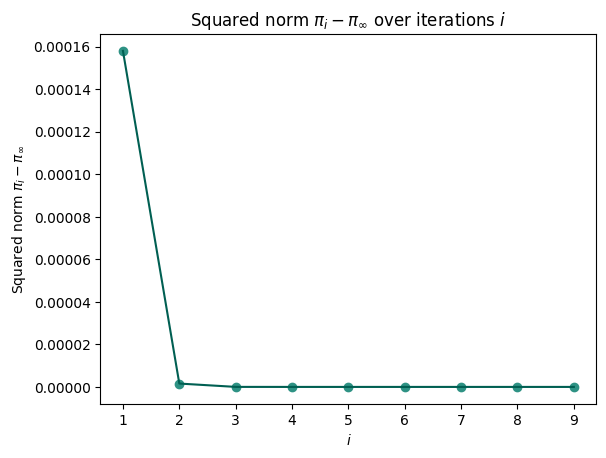

In [142]:
plt.scatter(np.arange(1,10), deltas.flatten(), c='#2E9284')
plt.plot(np.arange(1,10), deltas.flatten(), c="#005F52")
plt.title("Squared norm $\pi_{i} - \pi_{\infty}$ over iterations $i$")
plt.ylabel("Squared norm $\pi_{i} - \pi_{\infty}$")
plt.xlabel("$i$")
plt.show()


### Validate results with different initialization

In [143]:
init_pi = np.array([0.799, 0.2, 0.001])
init_pi = init_pi[:,np.newaxis]

In [144]:
deltas = np.array([np.dot(((init_pi.T @ np.linalg.matrix_power(P, i)).T - stationary[:,np.newaxis]).T, 
        ((init_pi.T @ np.linalg.matrix_power(P, i)).T - stationary[:,np.newaxis])) for i in range(1, 10)])

Plot $\left \lVert \pi_{i} - \pi_{\infty} \right \rVert_2^{2}$ for second initialization

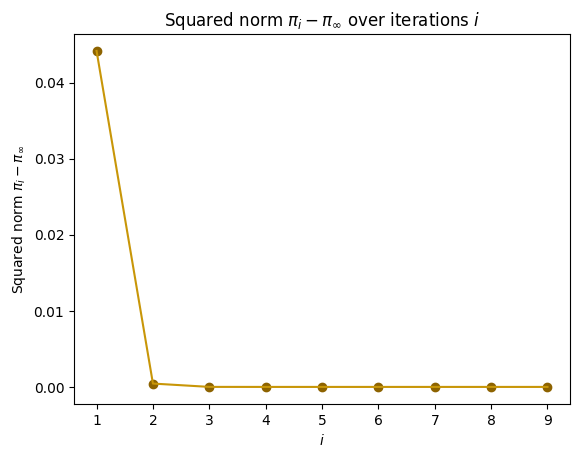

In [145]:
plt.scatter(np.arange(1,10), deltas.flatten(), c='#8D6300')
plt.plot(np.arange(1,10), deltas.flatten(), c="#C89608")
plt.title("Squared norm $\pi_{i} - \pi_{\infty}$ over iterations $i$")
plt.ylabel("Squared norm $\pi_{i} - \pi_{\infty}$")
plt.xlabel("$i$")
plt.show()


# 3. Absorbing State

In [146]:
## 3a. 
def simulate_arrival(P, init_state, end_state=3):
    X_i = init_state-1
    count = 0
    while X_i != end_state-1:
        X_i = sample_move(X_i, P)
        count += 1
    return count


In [147]:
new_P = np.array([[0.2, 0.7, 0.1],
                [0.2, 0.5, 0.3],
                [0, 0, 1]])

In [148]:
start_1 = [simulate_arrival(new_P, init_state=1, end_state=3) for _ in range(100000)]
start_2 = [simulate_arrival(new_P, init_state=2, end_state=3) for _ in range(100000)]

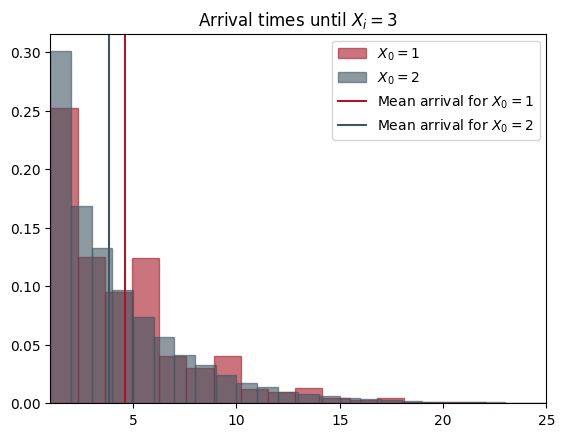

In [149]:

plt.hist(start_1, density=True, bins=len(np.unique(start_1)), label='$X_{0} = 1$',
         alpha=0.6,color='#A81829', edgecolor='#A81829')
plt.hist(start_2, density=True, bins=len(np.unique(start_2)), label='$X_{0}= 2$',
         alpha=0.6,color='#3F5661', edgecolor='#3F5661')
plt.axvline(x=np.mean(start_1), c='#A81829', label='Mean arrival for $X_{0} = 1$')
plt.axvline(x=np.mean(start_2), c='#3F5661', label='Mean arrival for $X_{0} = 2$')
plt.title("Arrival times until $X_{i} = 3$")
plt.xlim((1, 25))
plt.legend()

## 3b. Compare theoretical arrivals and empirical

Theoretical mean arrivals -- 


$\mu_{1} = 60/13$ 

$\mu_{2} = 50/13$ 

In [150]:
np.round(60/13, 3), np.round(50/13, 3)

(4.615, 3.846)

In [151]:
print("Simulated mean arrivals -- ")
print("mu_1: ", np.mean(start_1), "mu_2: ", np.mean(start_2)) 

Simulated mean arrivals -- 
mu_1:  4.6076 mu_2:  3.85271
